In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np

In [2]:
file=pd.read_csv(r"C:\Users\aksha\Desktop\AKSHARA\SEM 2\DATA SCIENCE\Proper\KNN\diabetes.csv")

In [8]:
file

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
103,1,81,72,18,40,26.6,0.283,24,0
104,2,85,65,0,0,39.6,0.930,27,0
105,1,126,56,29,152,28.7,0.801,21,0
106,1,96,122,0,0,22.4,0.207,27,0


<Axes: >

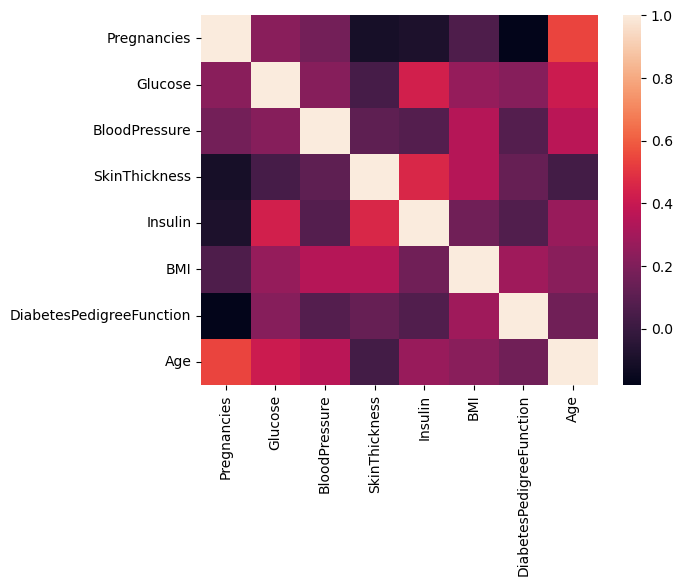

In [9]:
import seaborn as sns
fig = plt.figure()
corrM = file.drop('Outcome',axis=1).corr()
corrM = round(corrM,2)
sns.heatmap(corrM)

In [12]:
Q1 = file.quantile(0.25)
Q3 = file.quantile(0.75)
IQR = Q3 - Q1
df = file[~((file< (Q1 - 1.5 * IQR)) |(file > (Q3 + 1.5 * IQR))).any(axis=1)]

<Axes: >

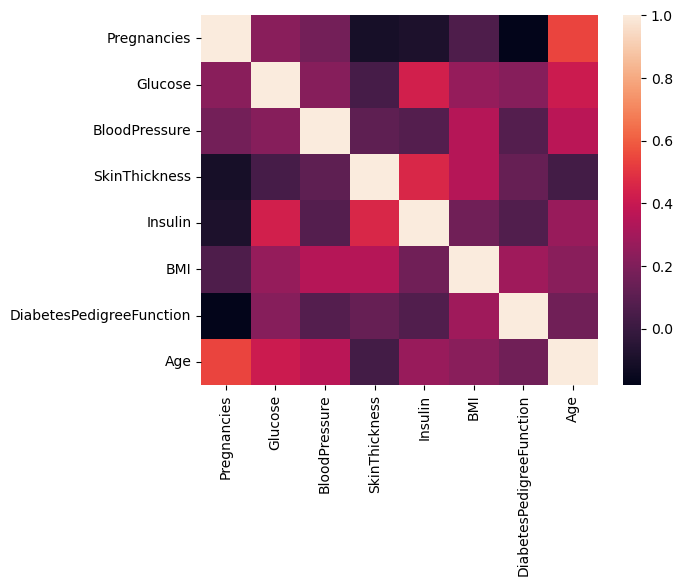

In [13]:
import seaborn as sns
fig = plt.figure()
corrM = file.drop('Outcome',axis=1).corr()
corrM = round(corrM,2)
sns.heatmap(corrM)

In [14]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,shuffle=True,random_state=42)

scale=StandardScaler()
scale.fit(x_train,y_train)


StandardScaler()

In [16]:
Score = []
Model = []
for i in range(2,35,2):
    model = KNeighborsClassifier(n_neighbors=i)
    x_train,x_test,y_Train,y_Test = train_test_split(x,y,test_size=0.1)
    model.fit(x_train,y_Train)
    score = model.score(x_train,y_Train)
   
    Score.append(score)
    Model.append(i)
    print("Model - {} Training Is Complete with score {}".format(i,score))
print(Model,Score)

Model - 2 Training Is Complete with score 0.7894736842105263
Model - 4 Training Is Complete with score 0.7368421052631579
Model - 6 Training Is Complete with score 0.75
Model - 8 Training Is Complete with score 0.75
Model - 10 Training Is Complete with score 0.7631578947368421
Model - 12 Training Is Complete with score 0.7105263157894737
Model - 14 Training Is Complete with score 0.7236842105263158
Model - 16 Training Is Complete with score 0.7105263157894737
Model - 18 Training Is Complete with score 0.6710526315789473
Model - 20 Training Is Complete with score 0.7236842105263158
Model - 22 Training Is Complete with score 0.7236842105263158
Model - 24 Training Is Complete with score 0.7105263157894737
Model - 26 Training Is Complete with score 0.7368421052631579
Model - 28 Training Is Complete with score 0.7236842105263158
Model - 30 Training Is Complete with score 0.7105263157894737
Model - 32 Training Is Complete with score 0.7105263157894737
Model - 34 Training Is Complete with sco

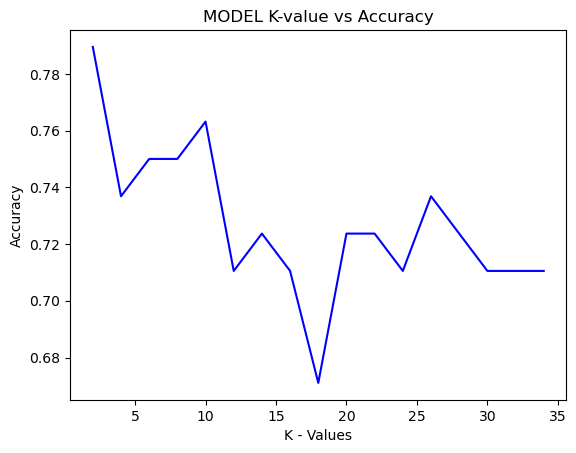

In [17]:
# scores = Score
# models = Model
plt.title("MODEL K-value vs Accuracy")
plt.xlabel('K - Values')
plt.ylabel('Accuracy')
plt.plot(Model,Score,'b-')

In [19]:
print(x_train.shape)  # This should show something like (76, n_features)
print(y_train.shape)  # This should ideally show (76,)


(76, 8)
(76,)


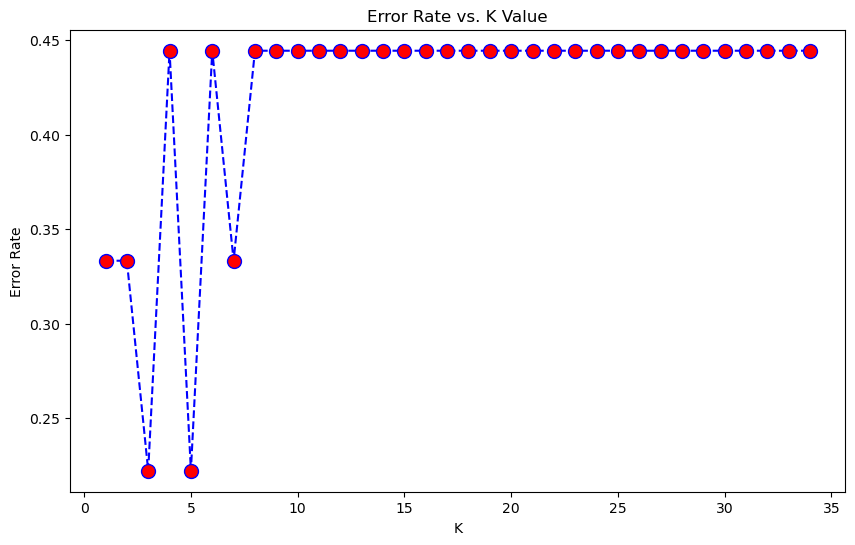

In [22]:
error_rate = []

# Will take some time
for i in range(1, 35):

	knn = KNeighborsClassifier(n_neighbors=i)
	knn.fit(x_train, y_train)
	pred_i = knn.predict(x_test)
	error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 35), error_rate, color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
